In [32]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
data = pd.read_csv("D://desktop//AAE722//raw_data//College.csv")
data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [33]:
#1
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),
                  'Accept': data['Accept']})

y = data['Enroll']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Enroll   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3813.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          1.67e-301
Time:                        22:01:16   Log-Likelihood:                -5721.4
No. Observations:                 777   AIC:                         1.145e+04
Df Residuals:                     775   BIC:                         1.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     82.3021     17.765      4.633      0.0

In [34]:
#1.a
design = MS(['Accept'])

X_1 = design.fit_transform(data)

new_predictions = results.get_prediction(X_1.iloc[:5]); 
new_predictions.predicted_mean 
print(new_predictions.predicted_mean)
new_predictions.conf_int(alpha=0.05)
print(new_predictions.conf_int(alpha=0.05))

[508.0642647  747.20989214 461.41013218 202.91167939 132.75768753]
[[479.79887554 536.32965386]
 [720.27853777 774.14124651]
 [432.65647858 490.16378578]
 [170.34255744 235.48080134]
 [ 98.88221955 166.6331555 ]]


C:\Users\bruce\AppData\Local\Temp\ipykernel_11308\1150974516.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\bruce\AppData\Local\Temp\ipykernel_11308\1150974516.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


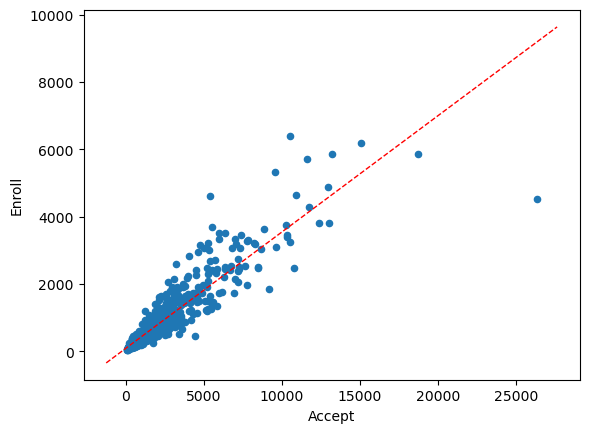

In [35]:
#1.b
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax = data.plot.scatter('Accept', 'Enroll')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=1)

In [36]:
#2
X = MS(['Accept', 'Expend']).fit_transform(data)
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(summarize(results1))

               coef  std err       t  P>|t|
intercept  163.9809   29.783   5.506  0.000
Accept       0.3480    0.006  62.109  0.000
Expend      -0.0090    0.003  -3.404  0.001


In [37]:
#2.a
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
print(vif)

           vif
Accept  1.0158
Expend  1.0158
